# Import all necessary dependencies and print out tensorflow and python versions.

In [1]:
import sys

import so_ml_tools as soml

import tensorflow as tf

from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.losses import binary_crossentropy
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn import datasets

2023-11-18 12:03:24.451953: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 12:03:24.451975: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 12:03:24.452004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Create a circles dataset and visualize the data

In [2]:
# Create dataset containing the X/Y coordinates and labels.
X, y = datasets.make_circles(n_samples=500, shuffle=True, random_state=42)

In [3]:
# Let's visualize the dataset first, let's look at 10 samples of the X and 10 samples of the Y
X[:10], y[:10]

(array([[-0.75098709,  0.27571434],
        [-0.26084151,  0.96538164],
        [-0.79974735,  0.02010408],
        [-0.72896863, -0.68454711],
        [-0.86392342,  0.5036232 ],
        [-0.71050916, -0.36766389],
        [-0.79898957, -0.04019545],
        [-0.99968419,  0.0251301 ],
        [-0.13779029,  0.99046143],
        [ 0.2472136 , -0.76084521]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1]))

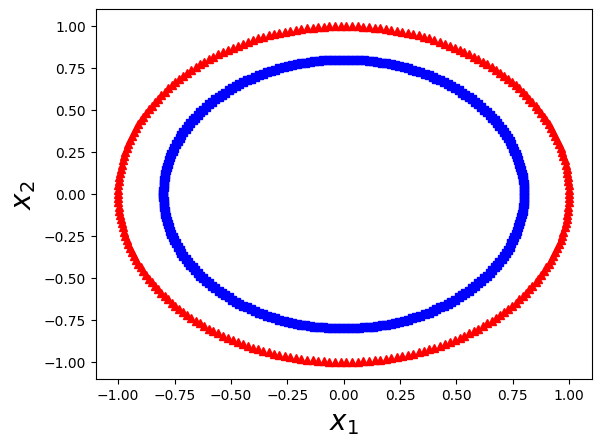

In [4]:
# Call the function to plot the data visually
soml.data.plot.xy_data_with_label(x=X, y=y)

### The X values are not normalized, they have both negative and positive numbers as their coordinate system, we need to try to normalize this so that the values are between 0 and 1. The Y values are either 0 or 1 which is just fine.

# Normalize the data, neural networks like to have their data between 0 and 1.

In [5]:
# Call the function with our X dataset to create the X_norm normalized dataset.
X_norm = soml.data.normalize.normalize_vector(x=X)

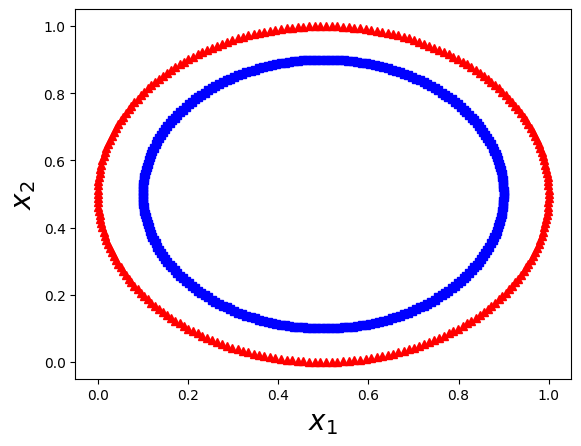

In [6]:
# Create the visualization again to see if everything worked out fine.
soml.data.plot.xy_data_with_label(x=X_norm, y=y)

### Now that the data is normalized we can split the data up into a training set and a test set.

# Create train / test datasets from the generated data

In [7]:
# Split the data up into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 400
Test size: 100


# Create a first baseline model, and display the model details.

In [8]:
tf.random.set_seed(42)

# Create the model
model_1 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Display the model information
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-18 12:03:26.366724: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [9]:
# Compile the model
model_1.compile(loss=binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.4975 - val_loss: 0.6970 - val_accuracy: 0.4600
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5200 - val_loss: 0.6976 - val_accuracy: 0.4300
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5350 - val_loss: 0.6965 - val_accuracy: 0.4200
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5200 - val_loss: 0.6965 - val_accuracy: 0.4400
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5150 - val_loss: 0.6966 - val_accuracy: 0.4300
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5175 - val_loss: 0.6964 - val_accuracy: 0.4300
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5175 - val_loss: 0.6960 - val_accuracy: 0.4300
Epoch 8/50
13/13 [==

### To model has finished the training, the results are not that great, the validation accuracy is only 65%, it is better then guessing but still not great. Let's plot the history in a graph to see if we can find some causes.

# Create plotting function and display the history

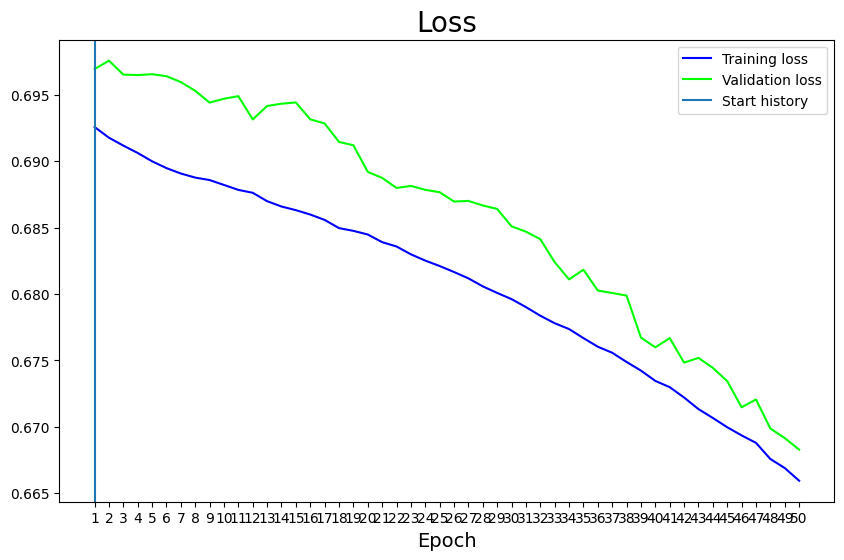

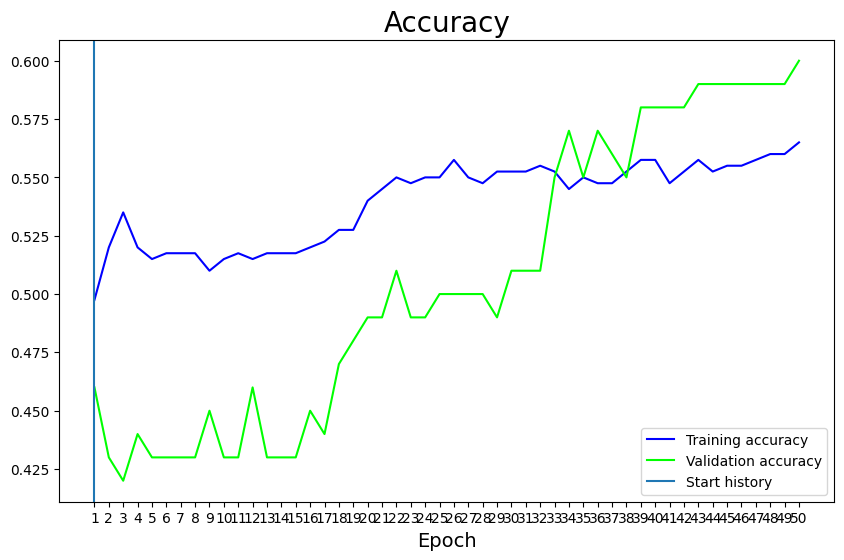

In [10]:
soml.tf.model.plot.plot_history(history=history_1)

### The model is not overfitting since the validation accuracy doesn't diverge from the training accuracy. We do see that the loss is still high so maybe our learning rate is a bit to small. The Adam optimizer has a default learning rate of 0.001. Let's see if we can find a more optimal learning rate.

### Another thing we can check is to see what the decission boundary is, for this we can also create a plot function.

313/313 [==============================] - 0s 284us/step
doing binary classification


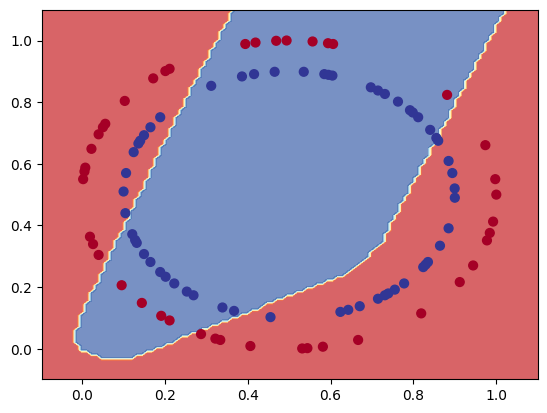

In [11]:
soml.evaluate.plot.decision_boundary(model=model_1, x=X_test, y=y_test)

# Find a more optimal learning rate

# Create a new model which will use the learning rate scheduler to adjust the learning rate.

In [12]:
tf.random.set_seed(42)

initial_lr = 0.001
epochs = 50

# Build the same model as model_1
model_2 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=initial_lr),
                metrics=["accuracy"])

lr_scheduler = soml.tf.fit.callback.learning_rate_scheduler_callback(learning_rate_start=initial_lr, epochs=epochs)

# Fit the model
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        callbacks=[
                            lr_scheduler,
                        ])


Min learning rate: 0.0010964781961431851
Max learning rate: 0.1
Division: 24
Epoch 1/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6890 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.4825 - val_loss: 0.6895 - val_accuracy: 0.5500 - lr: 0.0011
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.4950 - val_loss: 0.6889 - val_accuracy: 0.6200 - lr: 0.0012
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5325 - val_loss: 0.6887 - val_accuracy: 0.6100 - lr: 0.0013
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4950 - val_loss: 0.6890 - val_accuracy: 0.5600 - lr: 0.0015
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5050 - val_loss: 0.6895 - val_accuracy: 0.4300 - lr: 0.0016
Epoch

### Now let's plot the history and check where the ideal learning rate is.

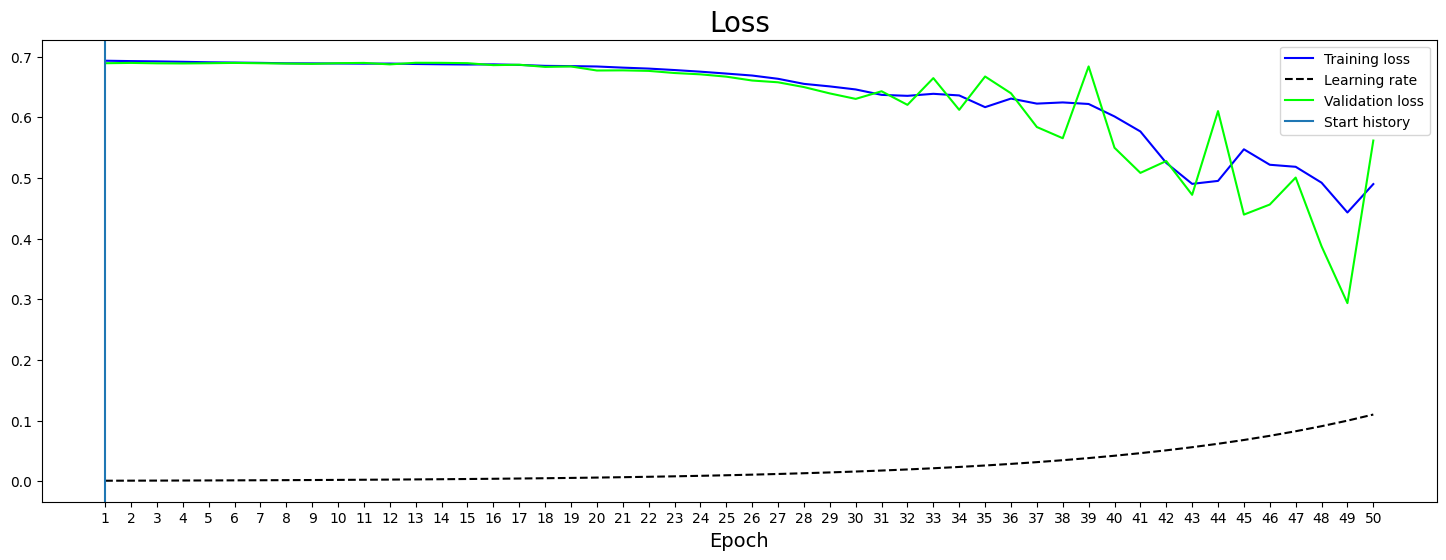

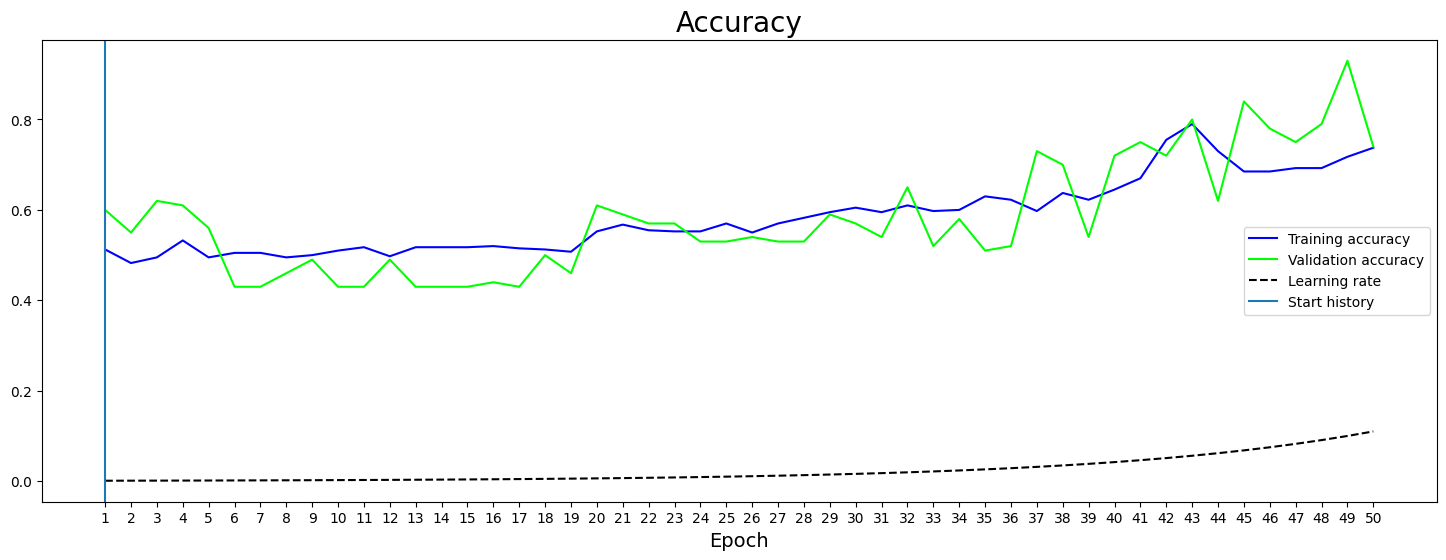

In [13]:
soml.tf.model.plot.plot_history(history=history_2, figsize=(18, 6))


### We can see that in the loss graph the loss is lowest around epoch 36 (counting from 0 that would be 37). After this the loss becomes erratic, so let's look at what the learning rate was at epoch 41 in the fit log above. For me this was around 0.0464. Create a new model and train it again.

In [23]:
# Build the same model as model_1
model_3 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=0.0287),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=50,
                        validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.4900 - val_loss: 0.6882 - val_accuracy: 0.5700
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5150 - val_loss: 0.7012 - val_accuracy: 0.4300
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5125 - val_loss: 0.6970 - val_accuracy: 0.4600
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5275 - val_loss: 0.6979 - val_accuracy: 0.5300
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5725 - val_loss: 0.6774 - val_accuracy: 0.4500
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.5675 - val_loss: 0.6818 - val_accuracy: 0.4900
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.5975 - val_loss: 0.6962 - val_accuracy: 0.4200
Epoch 8/50
13/13 [==

### In my case we achieved 100% validation accuracy around epoch 41. Let's look at the history.

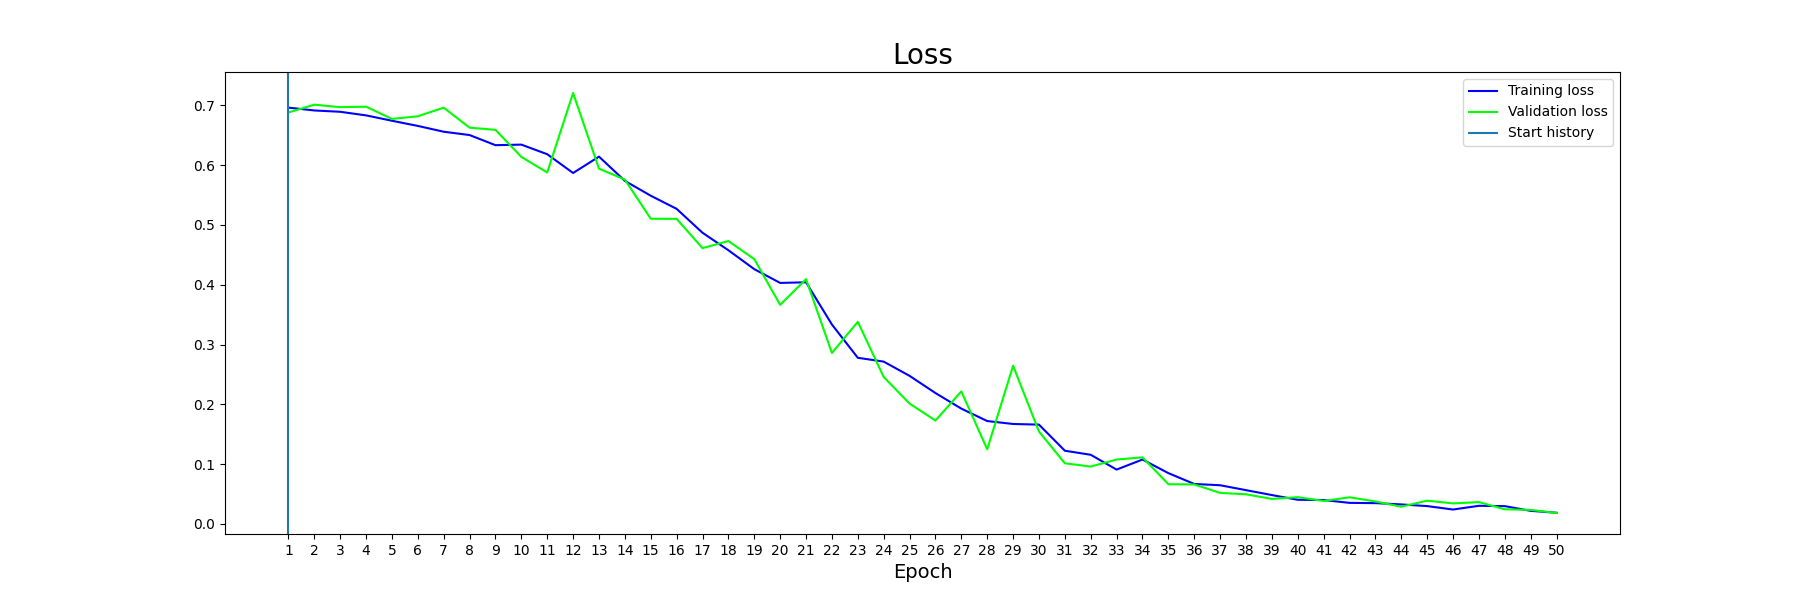

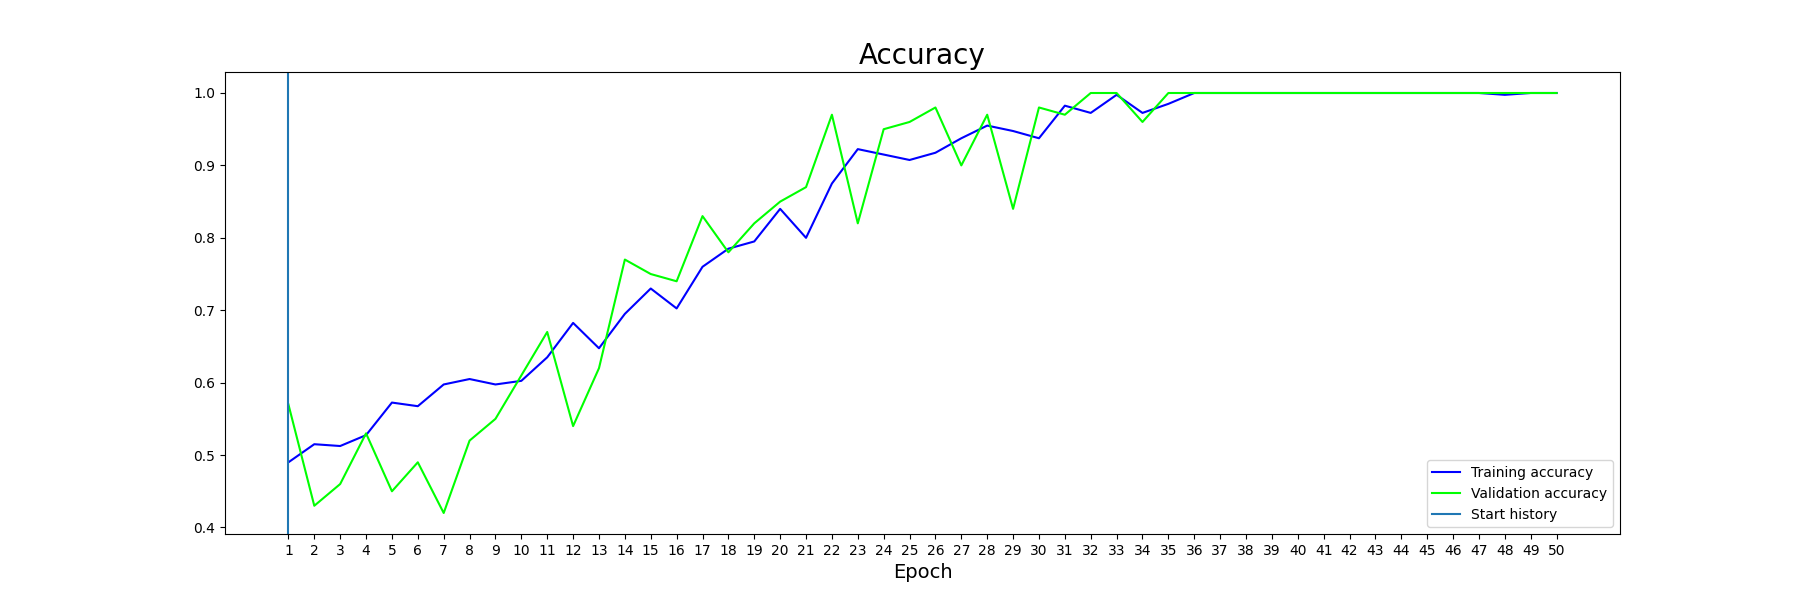

In [24]:
soml.tf.model.plot.plot_history(history=history_3, figsize=(18, 6))

### Let's also check the decission boundary

In [25]:
soml.evaluate.plot.decision_boundary(model=model_3, x=X_train, y=y_train)

313/313 [==============================] - 0s 321us/step
doing binary classification


In [26]:
%matplotlib widget

In [58]:
import itertools as _itertools

import matplotlib.pyplot as _plt
import numpy as _np
import tensorflow as _tf
import so_ml_tools as _soml

from scipy.interpolate import interp1d as _interp1d

from sklearn.metrics import confusion_matrix as _confusion_matrix
from sklearn.metrics import classification_report as _classification_report


def confusion_matrix(y_true, y_pred=None, y_prob=None, class_names: list[str] = None, figsize=(15, 15), text_size=10,
                     norm=False, savefig=False, label_color='black') -> None:
    """
   Plots a confusion matrix of the given data.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predictions (then y_prob is not necessary), must be same shape as y_true.
      y_prob: Array of probabilities (then y_pred is not necessary), must be same shape as y_true.
      class_names: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(15, 15)).
      text_size: Size of output figure text (default=10).
      norm: normalize values or not (default=False).
      savefig: save confusion matrix to file (default=False).

    Returns:
        None
    """

    if isinstance(y_true, _tf.data.Dataset):
        raise TypeError('y_true is a dataset, please get the labels from the dataset using '
                        '\'y_labels = soml.tf.dataset.get_labels(dataset=dataset)\'')

    y_true = _soml.util.label.to_prediction(y_prob=y_true)
    if y_pred is None and y_prob is not None:
        y_pred = _soml.util.label.to_prediction(y_prob=y_prob)
    elif y_pred is None and y_prob is None:
        raise "Must specify 'y_pred' or 'y_prob'"

    # Create the confusion matrix
    cm = _confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, _np.newaxis]  # normalize our confusion matrix
    n_classes = cm.shape[0]

    fig, ax = _plt.subplots(figsize=figsize)

    # Set background to transparent.
    fig.patch.set_alpha(0.0)
    
    # noinspection PyUnresolvedReferences
    # Color bar on the right side.
    cax = ax.matshow(cm, cmap=_plt.cm.Blues)
    cb = fig.colorbar(cax)
    cb.set_label('', color=label_color)
    cb.ax.yaxis.set_tick_params(color=label_color)
    _plt.setp(_plt.getp(cb.ax.axes, 'yticklabels'), color=label_color)

    # Set labels to be classes
    if class_names is not None:
        labels = class_names
    else:
        labels = _np.arange(cm.shape[0])

    # label the axes
    ax.set(title="Confusion matrix",
           xlabel="predicted label",
           ylabel="Actual label",
           xticks=_np.arange(n_classes),
           yticks=_np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    ax.xaxis.label.set_color(label_color)
    ax.yaxis.label.set_color(label_color)
    ax.title.set_color(label_color)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.title.set_size(text_size)

    _plt.xticks(rotation=70, fontsize=text_size, color=label_color)
    _plt.yticks(fontsize=text_size, color=label_color)

    # Set treshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
    for i, j in _itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            _plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                      horizontalalignment="center",
                      color="white" if cm[i, j] > threshold else "black",
                      size=text_size)
        else:
            _plt.text(j, i, f"{cm[i, j]}",
                      horizontalalignment="center",
                      color="white" if cm[i, j] > threshold else "black",
                      size=text_size)

    if savefig:
        fig.savefig("./confusion_matrix.png")

In [1]:
y_prob = model_3.predict(X_test)

confusion_matrix(y_true=y_test, y_prob=y_prob, figsize=(15, 15), text_size=10, label_color='black')

NameError: name 'model_3' is not defined

## Another method would be to use a combination of EarlyStopping and ReduceLROnPlateau

In [ ]:
tf.random.set_seed(42)

initial_lr = 0.01
epochs = 100

# Build the same model as model_1
model_4 = Sequential([
    Dense(10, activation="relu", input_shape=[2]),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss=binary_crossentropy,
                optimizer=Adam(learning_rate=initial_lr),
                metrics=["accuracy"])


# Fit the model
history_4 = model_4.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        callbacks=[
                            ReduceLROnPlateau("val_accuracy", verbose=1)
                        ])

In [ ]:
soml.tf.model.plot.plot_history(history=history_4, figsize=(18, 6))